In [1]:
import geopandas as gpd

In [2]:
precisely = gpd.read_file('data/precisely_ca.geojson')
precisely.head()

,OBJ_ID,OBJ_NAME,OBJ_TYP,OBJ_SUBTCD,OBJ_SUBTYP,COUNTRY,METRO,LAT,LON,RELDATE,OBJ_AREA,geometry
0,976,Anaheim Hills,Neighborhood,M,Macro Neighborhood,USA,"Orange County, CA",33.852096,-117.753387,20240404,5.033809e+07,"MULTIPOLYGON (((-117.73166 33.87934, -117.7315..."
1,983,The Colony,Neighborhood,M,Macro Neighborhood,USA,"Orange County, CA",33.839275,-117.918175,20240404,1.503115e+07,"MULTIPOLYGON (((-117.911 33.86323, -117.9109 3..."
2,984,Lindenwood,Neighborhood,N,Neighborhood,USA,"San Francisco, CA",37.469388,-122.179283,20240404,2.412709e+06,"MULTIPOLYGON (((-122.17364 37.4601, -122.17394..."
3,985,Lloyden Park,Neighborhood,N,Neighborhood,USA,"San Francisco, CA",37.465082,-122.202057,20240404,2.410226e+05,"MULTIPOLYGON (((-122.1999 37.46228, -122.20012..."
4,988,42nd Street,Neighborhood,N,Neighborhood,USA,"Bakersfield, CA",35.288921,-119.101021,20240404,2.582778e+06,"MULTIPOLYGON (((-119.09684 35.29615, -119.0965..."


In [3]:
precisely['OBJ_SUBTYP'].unique()

array(['Macro Neighborhood', 'Neighborhood', 'Sub Neighborhood'],
      dtype=object)

In [5]:
with open('data/precisely_macro.geojson', 'w') as f:
    f.write(precisely[precisely['OBJ_SUBTYP'] == 'Macro Neighborhood'].to_json())
with open('data/precisely_neighborhood.geojson', 'w') as f:
    f.write(precisely[precisely['OBJ_SUBTYP'] == 'Neighborhood'].to_json())
with open('data/precisely_micro.geojson', 'w') as f:
    f.write(precisely[precisely['OBJ_SUBTYP'] == 'Sub Neighborhood'].to_json())

In [ ]:
precisely[precisely['OBJ_SUBTYP'] == 'Neighborhood'].sjoin()

In [2]:
import pandas as pd
requested_cities = pd.read_csv('data/Missing CRMLS Cities - Found shapes.csv')
requested_cities.head()

,City,in_zillow,in_zillow_2017,in_precisely,in_census1,in_census2,Layer,Unnamed: 7,Hiearchy:
0,AGOURA,yes,False,False,False,False,3,NaN,Precisely
1,AMBOY,yes,False,False,False,False,3,NaN,Census2
2,ANDERSON,yes,True,False,True,True,3,NaN,Zillow2017
3,ANGELS CAMP,yes,False,False,False,False,3,NaN,NaN
4,ANGELUS OAKS,yes,False,False,False,False,3,NaN,NaN


In [32]:
len(requested_cities)

281

In [31]:
requested_cities[(~requested_cities['City'].str.lower().isin(precisely['OBJ_NAME'].str.lower()))]

,City,in_zillow,in_zillow_2017,in_precisely,in_census1,in_census2,Layer,Unnamed: 7,Hiearchy:
0,AGOURA,yes,False,False,False,False,3,NaN,Precisely
1,AMBOY,yes,False,False,False,False,3,NaN,Census2
2,ANDERSON,yes,True,False,True,True,3,NaN,Zillow2017
3,ANGELS CAMP,yes,False,False,False,False,3,NaN,NaN
4,ANGELUS OAKS,yes,False,False,False,False,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...
192,MALIBU,yes,False,False,True,True,3,NaN,NaN
195,MENIFEE,yes,False,False,True,True,3,NaN,NaN
236,SAN RAFAEL,yes,False,False,True,True,in layer 2 as son rafael,NaN,NaN
259,SUNNYVALE,yes,False,False,True,True,3,NaN,NaN


In [21]:
requested_cities[requested_cities['City'].isin(precisely[precisely['OBJ_SUBTYP'] == 'Sub Neighborhood']['OBJ_NAME'])]

,City,In Zillow
32,Baldwin Park,yes
69,Calabasas Hills,yes
85,Castellammare,no
94,Cheviot Hills,yes
129,Del Mar,yes
155,El Macero,yes
194,Garvanza,no
217,Hancock Park,yes
232,Highland Park,yes
234,Hillcrest,yes


In [14]:
requested_cities[requested_cities['City'].isin(precisely[precisely['OBJ_SUBTYP'] == 'Macro Neighborhood']['OBJ_NAME'])]

,City,In Zillow
3,Agoura Hills,yes
315,Los Altos Hills,yes


In [8]:
precisely.head()

,OBJ_ID,OBJ_NAME,OBJ_TYP,OBJ_SUBTCD,OBJ_SUBTYP,COUNTRY,METRO,LAT,LON,RELDATE,OBJ_AREA,geometry
0,976,Anaheim Hills,Neighborhood,M,Macro Neighborhood,USA,"Orange County, CA",33.852096,-117.753387,20240404,5.033809e+07,"MULTIPOLYGON (((-117.73166 33.87934, -117.7315..."
1,983,The Colony,Neighborhood,M,Macro Neighborhood,USA,"Orange County, CA",33.839275,-117.918175,20240404,1.503115e+07,"MULTIPOLYGON (((-117.911 33.86323, -117.9109 3..."
2,984,Lindenwood,Neighborhood,N,Neighborhood,USA,"San Francisco, CA",37.469388,-122.179283,20240404,2.412709e+06,"MULTIPOLYGON (((-122.17364 37.4601, -122.17394..."
3,985,Lloyden Park,Neighborhood,N,Neighborhood,USA,"San Francisco, CA",37.465082,-122.202057,20240404,2.410226e+05,"MULTIPOLYGON (((-122.1999 37.46228, -122.20012..."
4,988,42nd Street,Neighborhood,N,Neighborhood,USA,"Bakersfield, CA",35.288921,-119.101021,20240404,2.582778e+06,"MULTIPOLYGON (((-119.09684 35.29615, -119.0965..."


In [20]:
precisely[precisely['OBJ_SUBTYP'] == 'Neighborhood'].sjoin(precisely[precisely['OBJ_SUBTYP'] == 'Neighborhood'], predicate='overlaps')[['OBJ_NAME_left', 'OBJ_NAME_right']]

,OBJ_NAME_left,OBJ_NAME_right
283,Marina del Rey,Venice
296,Venice,Marina del Rey
795,Plata Arroyo,Mayfair North
849,Checkers,Mayfair North
862,Commodore,El Rancho Verde
...,...,...
5869,Airport North,Madera Acres
6002,North Turlock,Northwest Triangle
6006,Northwest Triangle,North Turlock
6178,Elk Grove Historic District,Waterman Meadows


In [25]:
pw_layer_2 = gpd.read_file('data/Layer2.geojson')
pw_layer_3 = gpd.read_file('data/Layer3.geojson')

In [27]:
pw_layer_3[~pw_layer_3['Display Name'].isin(precisely['OBJ_NAME'])]

,Display Name,Key,Selectable,PID,LAYER_3_PARENT_PID,geometry
1,Oak Hills,oak_hills_2707,TRUE,2707,233,"MULTIPOLYGON (((-117.43332 34.3398, -117.43338..."
15,Coachella,coachella_2679,TRUE,2679,248,"MULTIPOLYGON (((-116.13802 33.64208, -116.1392..."
26,Adelanto,adelanto_2713,TRUE,2713,21,"MULTIPOLYGON (((-117.39956 34.50668, -117.4019..."
35,La Cresta,la_cresta_2692,TRUE,2692,206,"MULTIPOLYGON (((-118.98516 35.39751, -118.9842..."
36,Phelan,phelan_2706,TRUE,2706,21,"MULTIPOLYGON (((-117.57381 34.38649, -117.5747..."
...,...,...,...,...,...,...
2703,Calexico,crmls_calexico_812,TRUE,812,395,"MULTIPOLYGON (((-115.53348 32.66196, -115.5309..."
2704,Mount Shasta,crmls_mount_shasta_660,TRUE,660,396,"MULTIPOLYGON (((-122.3478 41.34856, -122.32559..."
2705,De Anza Golf Estates,crmls_de_anza_golf_estates_2656,TRUE,2656,397,"MULTIPOLYGON (((-116.38343 33.28695, -116.3838..."
2706,Baker,crmls_baker_475,TRUE,475,398,"MULTIPOLYGON (((-116.08698 35.28459, -116.0851..."


In [28]:
len(pw_layer_3)

2712

In [56]:
precisely_all = gpd.read_file('data/NEIGHBORHOOD_BOUNDARIES_USA_202405_SHP/data', layer='neighborhood_census_usa')
precisely_all.head()

,OBJ_ID,STATE,STATEFIPS,CBSA,CBSAFIPS,CBSATYP,COUNTY,COUNTYFIPS,MCD_CCD,MCDFIPS,PLACE,PLACEFIPS
0,1,AK,02,"Anchorage, AK",11260,Metro,Anchorage,02020,Anchorage,03050,Anchorage,0203000
1,2,AK,02,"Anchorage, AK",11260,Metro,Anchorage,02020,Anchorage,03050,Anchorage,0203000
2,3,AK,02,"Anchorage, AK",11260,Metro,Anchorage,02020,Anchorage,03050,Anchorage,0203000
3,4,AK,02,"Anchorage, AK",11260,Metro,Anchorage,02020,Anchorage,03050,Anchorage,0203000
4,5,AK,02,"Anchorage, AK",11260,Metro,Anchorage,02020,Anchorage,03050,Anchorage,0203000


In [ ]:
precisely_all

In [38]:
precisely_la = gpd.read_file('data/precisely_in_LA_county.geojson')

In [39]:
precisely_la.head()

,OBJ_ID,OBJ_NAME,OBJ_TYP,OBJ_SUBTCD,OBJ_SUBTYP,COUNTRY,METRO,LAT,LON,RELDATE,...,STATE_NAME,LSAD,ALAND,AWATER,Layer Name,PID,Key,Display Name,pt_ct,geometry
0,1187,ADAMS HILL,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.129539,-118.244523,20240404,...,California,06,10515988166,1785003207,1,1,crmls_los_angeles_1,Los Angeles County,583,"MULTIPOLYGON (((-118.23777 34.13522, -118.2377..."
1,1188,BROCKMONT,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.175630,-118.258380,20240404,...,California,06,10515988166,1785003207,1,1,crmls_los_angeles_1,Los Angeles County,583,"MULTIPOLYGON (((-118.24348 34.17932, -118.2434..."
2,1189,CHEVY CHASE,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.168006,-118.205345,20240404,...,California,06,10515988166,1785003207,1,1,crmls_los_angeles_1,Los Angeles County,583,"MULTIPOLYGON (((-118.19649 34.17991, -118.1964..."
3,1190,CITRUS GROVE,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.147511,-118.238988,20240404,...,California,06,10515988166,1785003207,1,1,crmls_los_angeles_1,Los Angeles County,583,"MULTIPOLYGON (((-118.2288 34.14383, -118.22877..."
4,1191,CITY CENTER,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.150344,-118.252504,20240404,...,California,06,10515988166,1785003207,1,1,crmls_los_angeles_1,Los Angeles County,583,"MULTIPOLYGON (((-118.25266 34.15679, -118.2526..."


In [40]:
pw_layer_3.head()

,Display Name,Key,Selectable,PID,LAYER_3_PARENT_PID,geometry
0,Imperial Beach,imperial_beach_2694,TRUE,2694,256,"MULTIPOLYGON (((-117.13248 32.57957, -117.1324..."
1,Oak Hills,oak_hills_2707,TRUE,2707,233,"MULTIPOLYGON (((-117.43332 34.3398, -117.43338..."
2,Poway,poway_2695,TRUE,2695,253,"MULTIPOLYGON (((-117.06618 32.92772, -117.0662..."
3,Altadena,altadena_2688,TRUE,2688,15,"MULTIPOLYGON (((-118.11633 34.16961, -118.1164..."
4,National City,national_city_2710,TRUE,2710,256,"MULTIPOLYGON (((-117.11754 32.60641, -117.1185..."


In [44]:
overlaps = pw_layer_3.sjoin(precisely_la[['OBJ_NAME', 'OBJ_SUBTYP', 'geometry']], how='left', predicate='overlaps')
overlaps.head()

,Display Name,Key,Selectable,PID,LAYER_3_PARENT_PID,geometry,index_right,OBJ_NAME,OBJ_SUBTYP
0,Imperial Beach,imperial_beach_2694,TRUE,2694,256,"MULTIPOLYGON (((-117.13248 32.57957, -117.1324...",NaN,NaN,NaN
1,Oak Hills,oak_hills_2707,TRUE,2707,233,"MULTIPOLYGON (((-117.43332 34.3398, -117.43338...",NaN,NaN,NaN
2,Poway,poway_2695,TRUE,2695,253,"MULTIPOLYGON (((-117.06618 32.92772, -117.0662...",NaN,NaN,NaN
3,Altadena,altadena_2688,TRUE,2688,15,"MULTIPOLYGON (((-118.11633 34.16961, -118.1164...",288.0,NORTHEAST PASADENA,Macro Neighborhood
3,Altadena,altadena_2688,TRUE,2688,15,"MULTIPOLYGON (((-118.11633 34.16961, -118.1164...",298.0,BRIGDEN RANCH,Neighborhood


In [46]:
overlaps[(overlaps['OBJ_SUBTYP'] == 'Neighborhood') & (overlaps['Display Name'].str.lower() != overlaps['OBJ_NAME'].str.lower())]

,Display Name,Key,Selectable,PID,LAYER_3_PARENT_PID,geometry,index_right,OBJ_NAME,OBJ_SUBTYP
3,Altadena,altadena_2688,TRUE,2688,15,"MULTIPOLYGON (((-118.11633 34.16961, -118.1164...",298.0,BRIGDEN RANCH,Neighborhood
3,Altadena,altadena_2688,TRUE,2688,15,"MULTIPOLYGON (((-118.11633 34.16961, -118.1164...",809.0,EAST WASHINGTON VILLAGE,Neighborhood
3,Altadena,altadena_2688,TRUE,2688,15,"MULTIPOLYGON (((-118.11633 34.16961, -118.1164...",719.0,HISTORIC HIGHLANDS,Neighborhood
3,Altadena,altadena_2688,TRUE,2688,15,"MULTIPOLYGON (((-118.11633 34.16961, -118.1164...",292.0,VICTORY PARK,Neighborhood
3,Altadena,altadena_2688,TRUE,2688,15,"MULTIPOLYGON (((-118.11633 34.16961, -118.1164...",888.0,KINNELOA MESA,Neighborhood
...,...,...,...,...,...,...,...,...,...
2710,Rossmoyne,crmls_rossmoyne_111113,TRUE,111113,2,"MULTIPOLYGON (((-118.23327 34.16577, -118.2343...",14.0,GREENBRIAR,Neighborhood
2711,Adams Hill,crmls_adams_hill_111114,TRUE,111114,3,"MULTIPOLYGON (((-118.23778 34.1355, -118.23823...",61.0,GLASSELL PARK,Neighborhood
2711,Adams Hill,crmls_adams_hill_111114,TRUE,111114,3,"MULTIPOLYGON (((-118.23778 34.1355, -118.23823...",27.0,TROPICO,Neighborhood
2711,Adams Hill,crmls_adams_hill_111114,TRUE,111114,3,"MULTIPOLYGON (((-118.23778 34.1355, -118.23823...",15.0,MARIPOSA,Neighborhood


In [47]:
overlaps[pd.isna(overlaps['index_right'])]

,Display Name,Key,Selectable,PID,LAYER_3_PARENT_PID,geometry,index_right,OBJ_NAME,OBJ_SUBTYP
0,Imperial Beach,imperial_beach_2694,TRUE,2694,256,"MULTIPOLYGON (((-117.13248 32.57957, -117.1324...",NaN,NaN,NaN
1,Oak Hills,oak_hills_2707,TRUE,2707,233,"MULTIPOLYGON (((-117.43332 34.3398, -117.43338...",NaN,NaN,NaN
2,Poway,poway_2695,TRUE,2695,253,"MULTIPOLYGON (((-117.06618 32.92772, -117.0662...",NaN,NaN,NaN
4,National City,national_city_2710,TRUE,2710,256,"MULTIPOLYGON (((-117.11754 32.60641, -117.1185...",NaN,NaN,NaN
5,Solana Beach,solana_beach_2719,TRUE,2719,256,"MULTIPOLYGON (((-117.24953 32.98205, -117.2496...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2703,Calexico,crmls_calexico_812,TRUE,812,395,"MULTIPOLYGON (((-115.53348 32.66196, -115.5309...",NaN,NaN,NaN
2704,Mount Shasta,crmls_mount_shasta_660,TRUE,660,396,"MULTIPOLYGON (((-122.3478 41.34856, -122.32559...",NaN,NaN,NaN
2705,De Anza Golf Estates,crmls_de_anza_golf_estates_2656,TRUE,2656,397,"MULTIPOLYGON (((-116.38343 33.28695, -116.3838...",NaN,NaN,NaN
2706,Baker,crmls_baker_475,TRUE,475,398,"MULTIPOLYGON (((-116.08698 35.28459, -116.0851...",NaN,NaN,NaN


In [3]:
import folium
m = folium.Map(location=[34.0549, -118.2426], tiles="CartoDB Positron", zoom_start=9)
popup = folium.GeoJsonTooltip(
    fields=["OBJ_NAME"],
    aliases=["Precisely Neighborhood"],
    localize=True,
    labels=True
)
geo_j = precisely_la[precisely_la['OBJ_SUBTYP']=='Neighborhood'].to_json()
geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"}, tooltip=popup, name='Precisely')
geo_j.add_to(m)

popup = folium.GeoJsonTooltip(
    fields=["Display Name"],
    aliases=["PW Layer 3"],
    localize=True,
    labels=True
)
geo_j = pw_layer_3.to_json()
geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "blue"}, tooltip=popup, name='PW Layer 3')
geo_j.add_to(m)

folium.LayerControl().add_to(m)
m.save('precisely_la.html')

NameError: name 'precisely_la' is not defined

In [68]:
precisely_all[precisely_all['COUNTY'] == 'Los Angeles'].head()

,OBJ_ID,STATE,STATEFIPS,CBSA,CBSAFIPS,CBSATYP,COUNTY,COUNTYFIPS,MCD_CCD,MCDFIPS,PLACE,PLACEFIPS
642,1187,CA,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
643,1188,CA,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
644,1189,CA,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
645,1190,CA,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
646,1191,CA,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000


In [67]:
precisely_all.head()

,OBJ_ID,STATE,STATEFIPS,CBSA,CBSAFIPS,CBSATYP,COUNTY,COUNTYFIPS,MCD_CCD,MCDFIPS,PLACE,PLACEFIPS
0,1,AK,02,"Anchorage, AK",11260,Metro,Anchorage,02020,Anchorage,03050,Anchorage,0203000
1,2,AK,02,"Anchorage, AK",11260,Metro,Anchorage,02020,Anchorage,03050,Anchorage,0203000
2,3,AK,02,"Anchorage, AK",11260,Metro,Anchorage,02020,Anchorage,03050,Anchorage,0203000
3,4,AK,02,"Anchorage, AK",11260,Metro,Anchorage,02020,Anchorage,03050,Anchorage,0203000
4,5,AK,02,"Anchorage, AK",11260,Metro,Anchorage,02020,Anchorage,03050,Anchorage,0203000


In [32]:
precisely_all = gpd.read_file('data/NEIGHBORHOOD_BOUNDARIES_USA_202405_SHP/data', layer='neighborhood_objects_usa')
precisely_all_census = gpd.read_file('data/NEIGHBORHOOD_BOUNDARIES_USA_202405_SHP/data', layer='neighborhood_census_usa')
precisely_all_census[precisely_all_census['COUNTY'] == 'Los Angeles'].head()

,OBJ_ID,STATE,STATEFIPS,CBSA,CBSAFIPS,CBSATYP,COUNTY,COUNTYFIPS,MCD_CCD,MCDFIPS,PLACE,PLACEFIPS
642,1187,CA,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
643,1188,CA,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
644,1189,CA,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
645,1190,CA,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
646,1191,CA,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000


In [33]:
precisely_all = precisely_all.merge(precisely_all_census, on='OBJ_ID')
precisely_all[precisely_all['COUNTYFIPS'] == '06037'].head()

,OBJ_ID,OBJ_NAME,OBJ_TYP,OBJ_SUBTCD,OBJ_SUBTYP,COUNTRY,METRO,LAT,LON,RELDATE,...,STATEFIPS,CBSA,CBSAFIPS,CBSATYP,COUNTY,COUNTYFIPS,MCD_CCD,MCDFIPS,PLACE,PLACEFIPS
642,1187,Adams Hill,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.129539,-118.244523,20240404,...,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
643,1188,Brockmont,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.175630,-118.258380,20240404,...,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
644,1189,Chevy Chase,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.168006,-118.205345,20240404,...,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
645,1190,Citrus Grove,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.147511,-118.238988,20240404,...,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
646,1191,City Center,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.150344,-118.252504,20240404,...,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000


In [34]:
county_sub = gpd.read_file('data/cb_2023_06_cousub_500k/').to_crs('EPSG:4326')
la_layer_2 = county_sub[county_sub['COUNTYFP'] == '037']
la_layer_2.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
1,06,037,93090,01935314,0600000US0603793090,0603793090,South Antelope Valley,South Antelope Valley CCD,CA,Los Angeles County,California,22,2763735996,8668065,"POLYGON ((-118.42369 34.42691, -118.42307 34.4..."
34,06,037,91750,01935180,0600000US0603791750,0603791750,Los Angeles,Los Angeles CCD,CA,Los Angeles County,California,22,692183205,135025322,"POLYGON ((-118.59805 34.07621, -118.5725 34.11..."
108,06,037,92110,01935216,0600000US0603792110,0603792110,Newhall,Newhall CCD,CA,Los Angeles County,California,22,1245493664,15989245,"POLYGON ((-118.81821 34.66585, -118.81866 34.6..."
118,06,037,92360,01935241,0600000US0603792360,0603792360,Palos Verdes,Palos Verdes CCD,CA,Los Angeles County,California,22,411526162,1204307671,"MULTIPOLYGON (((-118.42816 33.77435, -118.4244..."
123,06,037,92785,02378253,0600000US0603792785,0603792785,San Fernando Valley,San Fernando Valley CCD,CA,Los Angeles County,California,22,1134660771,4517464,"POLYGON ((-118.71138 34.10682, -118.71132 34.1..."


In [35]:
precisely_la = precisely_all[(precisely_all['OBJ_SUBTYP'] == 'Neighborhood') & (precisely_all['COUNTYFIPS'] == '06037')]
precisely_la.head()

,OBJ_ID,OBJ_NAME,OBJ_TYP,OBJ_SUBTCD,OBJ_SUBTYP,COUNTRY,METRO,LAT,LON,RELDATE,...,STATEFIPS,CBSA,CBSAFIPS,CBSATYP,COUNTY,COUNTYFIPS,MCD_CCD,MCDFIPS,PLACE,PLACEFIPS
642,1187,Adams Hill,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.129539,-118.244523,20240404,...,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
643,1188,Brockmont,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.175630,-118.258380,20240404,...,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
644,1189,Chevy Chase,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.168006,-118.205345,20240404,...,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
645,1190,Citrus Grove,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.147511,-118.238988,20240404,...,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000
646,1191,City Center,Neighborhood,N,Neighborhood,USA,"Los Angeles, CA",34.150344,-118.252504,20240404,...,06,"Los Angeles-Long Beach-Anaheim, CA",31080,Metro,Los Angeles,06037,San Fernando Valley,92785,Glendale,0630000


<Axes: >

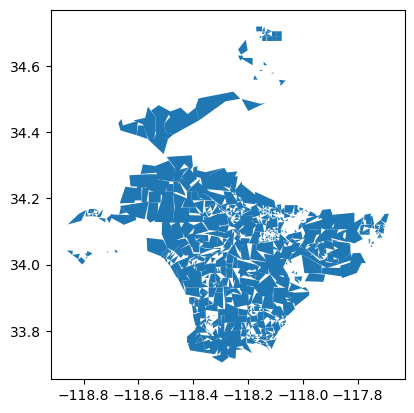

In [36]:
precisely_la.simplify(tolerance=0.01).plot()

<Axes: >

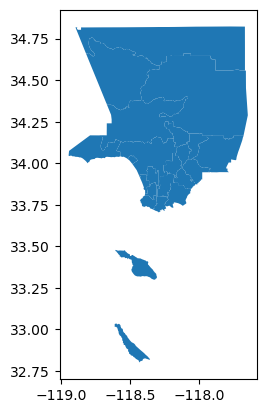

In [37]:
la_layer_2['geometry'].plot()

In [38]:
precisely_la.sjoin(la_layer_2, predicate='overlaps')[['OBJ_NAME', 'NAME', 'MCD_CCD', 'geometry']].to_file('data/overlaps.geojson', driver='GeoJSON')

In [104]:
len(precisely_la)

602

In [105]:
precisely_la.to_file('data/precisely_la.geojson', driver="GeoJSON")
la_layer_2.to_file('data/la_layer_2.geojson', driver="GeoJSON")

In [45]:
overlaps = precisely_la.sjoin(la_layer_2, predicate='overlaps').reset_index(drop=True)[['OBJ_ID', 'OBJ_NAME', 'NAME', 'MCD_CCD']]
overlaps.columns = ['id', 'layer3_name', 'layer2_name', 'real_layer2']
overlaps.head()

,id,layer3_name,layer2_name,real_layer2
0,1187,Adams Hill,Los Angeles,San Fernando Valley
1,1187,Adams Hill,San Fernando Valley,San Fernando Valley
2,1189,Chevy Chase,San Fernando Valley,San Fernando Valley
3,1189,Chevy Chase,Pasadena,San Fernando Valley
4,1190,Citrus Grove,Los Angeles,San Fernando Valley


In [ ]:
import shapely
def fix_parent_layer(child_layer: shapely.Polygon, parent_layer: list):

In [104]:
overlaps.groupby('layer2_name')['layer3_name'].nunique().sort_values()

layer2_name
North Antelope Valley            2
Newhall                          3
Agoura Hills-Malibu              9
Palos Verdes                    11
Santa Monica                    13
Whittier                        13
South Antelope Valley           15
South Bay Cities                17
South Gate-East Los Angeles     17
Torrance                        17
East San Gabriel Valley         19
Compton                         22
Inglewood                       23
Downey-Norwalk                  24
Southwest San Gabriel Valley    25
Upper San Gabriel Valley        26
Pasadena                        31
Long Beach-Lakewood             36
San Fernando Valley             39
Los Angeles                     92
Name: layer3_name, dtype: int64

In [109]:
overlaps[(overlaps['layer3_name'] == 'Montebello') & (overlaps['layer2_name'] != overlaps['real_layer2'])]

,id,layer3_name,layer2_name,real_layer2
123,20514,Montebello,Downey-Norwalk,Southwest San Gabriel Valley
124,20514,Montebello,Whittier,Southwest San Gabriel Valley
125,20514,Montebello,South Gate-East Los Angeles,Southwest San Gabriel Valley
127,20514,Montebello,Upper San Gabriel Valley,Southwest San Gabriel Valley


In [113]:
overlaps[(overlaps['layer2_name'] == 'Los Angeles')]

,id,layer3_name,layer2_name,real_layer2
0,1187,Adams Hill,Los Angeles,San Fernando Valley
4,1190,Citrus Grove,Los Angeles,San Fernando Valley
11,1197,Glenoaks Canyon,Los Angeles,San Fernando Valley
14,1199,Grand Central,Los Angeles,San Fernando Valley
18,1210,Riverside Rancho,Los Angeles,San Fernando Valley
...,...,...,...,...
417,998358,Lennox,Los Angeles,Inglewood
421,998361,Vermont Vista,Los Angeles,Los Angeles
445,1279094,Alhambra Hills,Los Angeles,Southwest San Gabriel Valley
447,1279095,Shorb Street,Los Angeles,Southwest San Gabriel Valley


In [116]:
precisely_la[precisely_la['OBJ_ID'] == 998361]['MCD_CCD'].values[0]

'Los Angeles'

In [52]:
overlaps[(overlaps['layer3_name'] == 'Montebello') & (overlaps['layer2_name'] == overlaps['real_layer2'])]

,id,layer3_name,layer2_name,real_layer2
126,20514,Montebello,Southwest San Gabriel Valley,Southwest San Gabriel Valley


In [103]:
import shapely
overlaps_correct = overlaps[(overlaps['layer3_name'] == 'Los Angeles') & (overlaps['layer2_name'] == overlaps['real_layer2'])]
real_parent_geo = la_layer_2[la_layer_2['NAME'] == overlaps_correct['layer2_name'].values[0]]['geometry'].values[0]
child = precisely_la[precisely_la['OBJ_ID'] == overlaps_correct['id'].values[0]]['geometry'].values[0]
shapely.coverage_union(real_parent_geo, shapely.difference(child, real_parent_geo))

IndexError: index 0 is out of bounds for axis 0 with size 0

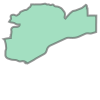

In [84]:
child

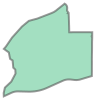

In [83]:
shapely.difference(child, real_parent_geo)

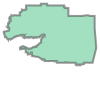

In [97]:
remove_parents = []
overlaps_incorrect = overlaps[(overlaps['layer3_name'] == 'Canyon Country') & (overlaps['layer2_name'] != overlaps['real_layer2'])]
for p in overlaps_incorrect['layer2_name']:
    geo_to_change = la_layer_2[la_layer_2['NAME'] == p]['geometry'].values[0]
    remove_parents.append(shapely.difference(geo_to_change, child))
remove_parents[0]

In [102]:
m = folium.Map(location=[34.0549, -118.2426], tiles="CartoDB Positron", zoom_start=9)

m = folium.Map(location=[34.0549, -118.2426], tiles="CartoDB Positron", zoom_start=9)
geo_j = shapely.coverage_union(real_parent_geo, shapely.difference(child, real_parent_geo))
geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"}, name='changed_parent')
geo_j.add_to(m)
geo_j = real_parent_geo
geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "blue"}, name='og_parent')
geo_j.add_to(m)
geo_j = child
geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "red"}, name='child')
geo_j.add_to(m)

geo_j = remove_parents[0]
geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "yellow"}, name='changed_shape')
geo_j.add_to(m)

geo_j = la_layer_2[la_layer_2['NAME'] == p]['geometry'].values[0]
geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "green"}, name='og_shape')
geo_j.add_to(m)

folium.LayerControl().add_to(m)
m.save('data/it_worked.html')

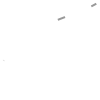

In [82]:
shapely.difference(remove_parents[0],la_layer_2[la_layer_2['NAME'] =='South Antelope Valley']['geometry'].values[0])

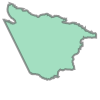

In [79]:
la_layer_2[la_layer_2['NAME'] == 'Newhall']['geometry'].values[0]

In [87]:
len(la_layer_2)

20

In [89]:
len(la_layer_2['COUSUBFP'].unique())

20

In [92]:
la_layer_2[['COUSUBFP', 'NAME']].to_csv('data/pid_mcd.csv', index=False)